   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
Accuracy: 100.00%
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



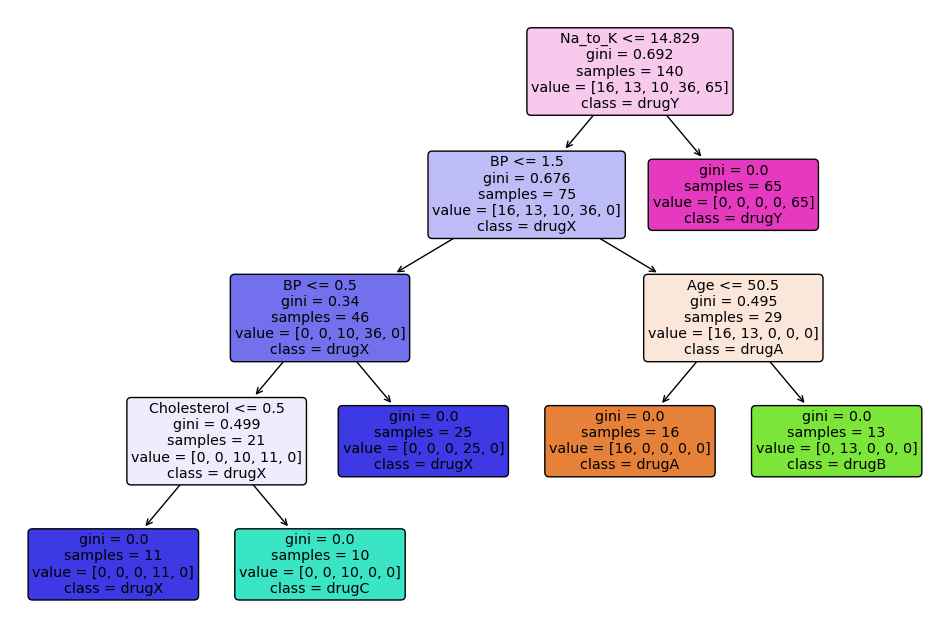

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

data = pd.read_csv(r'/content/drug200.csv')


print(data.head())

data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})  # Assuming 'M' = Male, 'F' = Female
data['BP'] = data['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})  # BP categories 'LOW', 'NORMAL', 'HIGH'
data['Cholesterol'] = data['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})  # Cholesterol categories 'NORMAL', 'HIGH'

# Features (Age, Sex, BP, Cholesterol, Na_to_K)
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]  # Updated to match the correct order of columns
# Target (Drug)
y = data['Drug']  # The 'Drug' column is the target variable

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Display the classification report
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=clf.classes_, rounded=True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')